# **American Sign Language Real-Time Detection**
## **Training**

## Settings

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd /yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 16977, done.
remote: Counting objects: 100% (172/172), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 16977 (delta 90), reused 109 (delta 53), pack-reused 16805 (from 1)
Receiving objects: 100% (16977/16977), 15.71 MiB | 19.52 MiB/s, done.
Resolving deltas: 100% (11619/11619), done.
/content/yolov5/yolov5


In [ ]:
from IPython.display import Image, display
import torch
import glob

torch.manual_seed(4200);

gpu = True

if gpu == True:
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

## Dataset

In [ ]:
%cd /content
!curl -L 'https://public.roboflow.com/ds/RzcCBKoedH?key=DvQRgYMRpF' > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

/content
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   910  100   910    0     0   3518      0 --:--:-- --:--:-- --:--:--  3513
100 22.3M  100 22.3M    0     0  27.0M      0 --:--:-- --:--:-- --:--:-- 27.0M
Archive:  roboflow.zip
 extracting: test/images/G7_jpg.rf.04faf434dd590a7bd02818b2b57a704f.jpg  
 extracting: test/images/S6_jpg.rf.0b6e42445a56998369cdd3759c2cf3d4.jpg  
 extracting: test/images/T24_jpg.rf.068e7b2424eac996c86bb6d9c38e083d.jpg  
 extracting: test/images/K12_jpg.rf.1bd849de853e33f6262b6643555e098f.jpg  
 extracting: test/images/J9_jpg.rf.213a9e356777a13d336e4988c33a93e1.jpg  
 extracting: test/images/X9_jpg.rf.28187742b082579d85eda81cf98bf5bb.jpg  
 extracting: test/images/B15_jpg.rf.0f0628552139144fc67c453e1f1b7b15.jpg  
 extracting: test/images/W24_jpg.rf.1bc37c6fc4770b284edc6f9027eb6cf2.jpg  
 extracting: test/images/S16_jpg.rf.138a4aa81180adcc2432

In [ ]:
!more /content/data.yaml

train: ../train/images
val: ../valid/images

nc: 26
names: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S
', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


## Training

In [ ]:
!python /content/yolov5/train.py --img 448 --batch 64 --epochs 500 --data /content/data.yaml --weights yolov5s.pt --workers 8

Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
     99/499      8.27G     0.0225   0.008996    0.01867        126        448:  42% 10/24 [00:08<00:16,  1.16s/it]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
     99/499      8.27G    0.02286   0.009157    0.01938        156        448:  46% 11/24 [00:09<00:16,  1.25s/it]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
     99/499      8.27G    0.02296   0.009098    0.01984        130        448:  50% 12/24 [00:11<00:14,  1.22s/it]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):


## Validation

In [ ]:
!python /content/yolov5/val.py --weights /content/yolov5/runs/train/exp/weights/best.pt --data /content/data.yaml --img 448

val: data=/content/data.yaml, weights=['/content/yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=448, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-371-g6629839d Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7080247 parameters, 0 gradients, 16.0 GFLOPs
val: Scanning /content/valid/labels.cache... 144 images, 0 backgrounds, 0 corrupt: 100% 144/144 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 5/5 [00:05<00:00,  1.00s/it]
                   all        144        144      0.885      0.893       0.96      0.777
                     A        144          5      0.811      0.869      0.962      0.828
                     B 

In [ ]:
for imageName in glob.glob('/content/yolov5/runs/val/exp2/*.jpg'):
    display(Image(filename=imageName, width=1000, height=1000))
    print('\n')

## Test

In [ ]:
!python /content/yolov5/detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 448 --conf 0.5 --source /content/test/images --line-thickness 3

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/test/images, data=yolov5/data/coco128.yaml, imgsz=[448, 448], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-371-g6629839d Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7080247 parameters, 0 gradients, 16.0 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/72 /content/test/images/A22_jpg.rf.f02ad8558ce1c88213b4f83c0bc66bc8.jpg: 448x448 1 A, 7.5ms
image 2/72 /content/test/images/B14_jpg.rf.ed5ba6d44f55ab03e62d2baeac4aa1aa.jpg: 448x448 1 B, 11.2ms
image 3/72 /content/test/images/B15_jpg.r

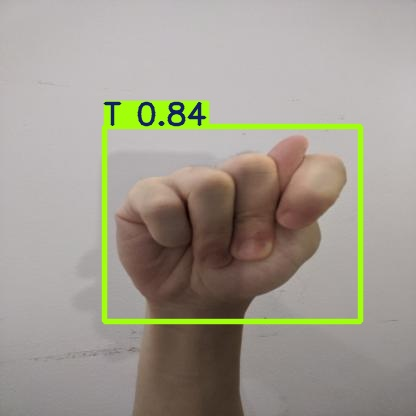

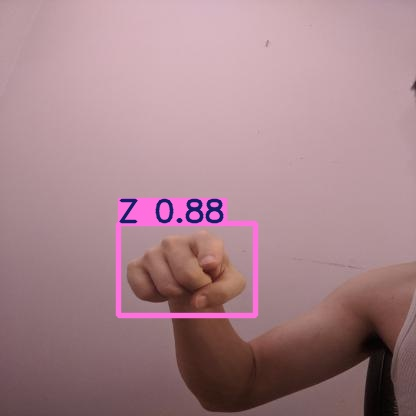

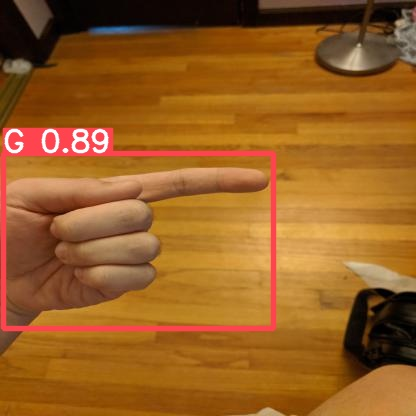

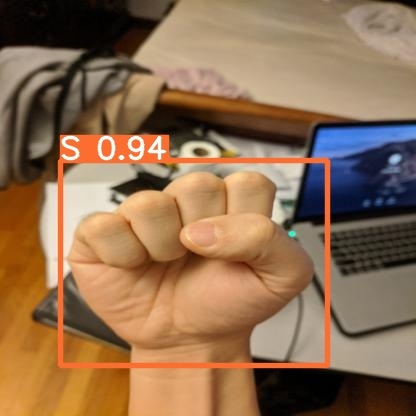

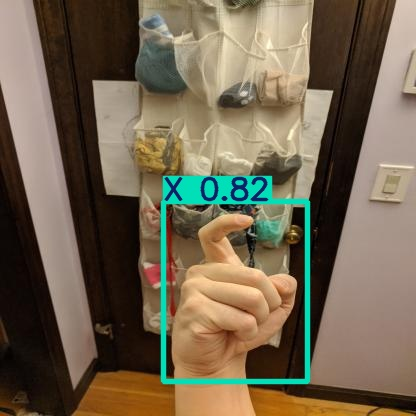

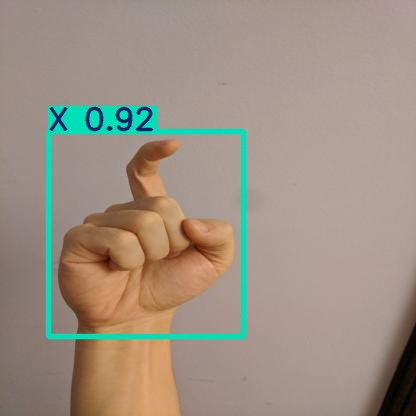

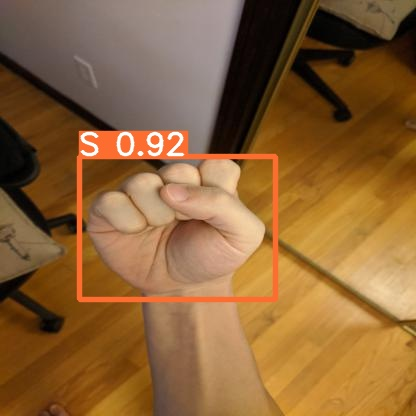

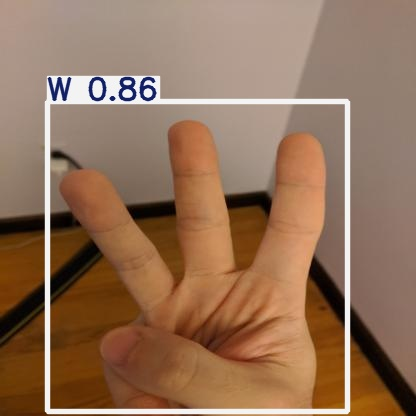

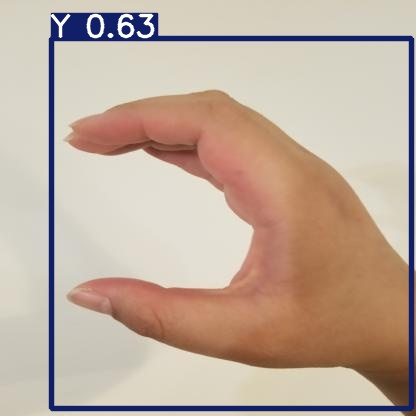

In [ ]:
count = 0
max_display = 10

for imageName in glob.glob('/content/yolov5/runs/detect/exp2/*.jpg'):
    count += 1
    if count == max_display:
        break;

    display(Image(filename=imageName, width=300, height=300))
    print("\n")

In [ ]:
!zip -r /content/yolov5.zip /content/yolov5

Streaming output truncated to the last 5000 lines.
  adding: content/yolov5/train/images/Y12_jpg.rf.9c7bc875dd16f637f5b0c509775baa7b.jpg (deflated 2%)
  adding: content/yolov5/train/images/K25_jpg.rf.aa60dd14efaef3670884f83f5e8e0416.jpg (deflated 1%)
  adding: content/yolov5/train/images/D8_jpg.rf.94d8d1eb9cff84765f81c632d07edc46.jpg (deflated 5%)
  adding: content/yolov5/train/images/L7_jpg.rf.a4a99e404bc702e0354e4d0ef842a200.jpg (deflated 4%)
  adding: content/yolov5/train/images/G8_jpg.rf.1c5dfe424c343ada7600387526c29ca1.jpg (deflated 1%)
  adding: content/yolov5/train/images/S14_jpg.rf.2b2f15ec8208d5b596764271ebc6fac6.jpg (deflated 1%)
  adding: content/yolov5/train/images/V16_jpg.rf.e0776ae9aa018eced61702fba2c39d78.jpg (deflated 2%)
  adding: content/yolov5/train/images/W9_jpg.rf.5cb9add511c7dec710dd30c38471f4b5.jpg (deflated 2%)
  adding: content/yolov5/train/images/T9_jpg.rf.c607f88c2d171ab2e0b720e3aedf1fb1.jpg (deflated 4%)
  adding: content/yolov5/train/images/U20_jpg.rf.84374